<a href="https://colab.research.google.com/github/Divyanka44/Customer-Sentiment-Analysis/blob/main/Text_mining_Final_Project_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Customer reviews sentiment classification and Prediction

**Team** : Divyanka Phadtare, Sahit Potnuru

**Introduction:** Data from customer reviews is being used as a tool to gain insight into consumption-related decisions as the understanding of its associated sentiment, grants businesses invaluable market awareness and the ability to proactively address issues early.

**Background:** A round 353 million products available for to purchase on their marketplace. With that amount of products available it is important for developers/manufactureres to know which products are profitable. Customer reviews/feedback analysis is important.

**Problem Statement:** Product reviews are an opportunity for businesses to find out how clients feel about them and why. Reviews play a significant role in influencing the purchase decisions of your visitors and potential leads.Hence it is important to conduct an analysis of customer's sentiments and build strong performing performance models.

**Dataset Description:** The dataset we have chosen is that of amazon electronic devices as Amazon is the largest online vendor for electronic devices. Because of its popularity and ubiquity, Amazon is really the place where people actually spend time and write detailed reviews, unlike other platforms where consumers have to be nudged. More than 80% of Amazon product buyers trust online reviews, so a good analysis of the reviews is important. So we chose this dataset and we got the dataset from Kaggle.




In [ ]:
# Installing required libraries
!pip install wordcloud
!pip install matplotlib
!pip install autocorrect
!pip install transformers
!pip install tensorflow
!pip install lightgbm
!pip install nlp
!pip install vaderSentiment

     |████████████████████████████████| 622 kB 15.1 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=e6e68bf55f279101a065f78fcfeb4a7730ed5619c7e3675b0fadf226c87bcf01
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect
     |████████████████████████████████| 4.0 MB 14.1 MB/s 
     |████████████████████████████████| 880 kB 52.0 MB/s 
     |████████████████████████████████| 6.6 MB 45.8 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=90129786622dd3a2e670df67963518eea115e31df6bf400a41e4b71a1b855d19
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installa

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
import nltk
from nltk import word_tokenize


from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

from autocorrect import Speller
# from hatesonar import Sonar
from transformers import pipeline
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import roc_auc_score
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
products_df = pd.read_csv('/content/sample_data/Amazon_dataset_final (1).csv')
print(products_df.shape)
products_df.head()

(1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


**Pre-Processing:** This is a crucial part before we move onto modelling. For this, we have used the latest available text processing techniques at our dispense.


**Tokenization:** Tokenization is a common task in Natural Language Processing. It is a fundamental step in both traditional NLP methods like Count Vectorizer. We have performed this step for all the comments from the dataset.
Spelling Mistakes: Also, as most of the comments had spelling mistakes, we have used the ‘autocorrect’ library to ensure the quality of the data prevails.


**Lemmatization:** Lemmatization in NLTK is the algorithmic process of finding the lemma of a word depending on its meaning and context. To reduce the dimensionality of the dataset, we have lemmatized tokens form prior step.
Stop Words Removal: Most common words in the language do not give any additional information (“the”, “a”, “an”, “so”), so we have removed the stop words from the dataset using ‘stop words’ library.


**Analysis with 2 stemming algorithms**

We tried 2 stemming algorithms which are **Snowball stemming and porter stemmer**. But we came across issues of over stemming and under stemming which led to not so meaningful or inappropriate stems. We did some lemmatization and did a comparative study in the code, of all the 3. Snowball stemmer is more aggressive than portal stemmer, we found little difference in the working of the 2 stemming methods.
 On comparing it with lemmatization, we found the accuracy of both the stemming algorithms to be less, **so we went ahead with the lemmatized tokens for our further analysis.**

In [ ]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text




df=pd.DataFrame()

df['reviews.text']=products_df['reviews.text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['reviews.text'].apply(lambda x: tokenization(x.lower()))#(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [ ]:
df

,reviews.text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,I initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[initially, trouble, deciding, paperwhite, voy...","[initi, troubl, decid, paperwhit, voyag, revie...","[initi, troubl, decid, paperwhit, voyag, revie...","[initially, trouble, deciding, paperwhite, voy..."
1,Allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, preface, little, history, casual, read...","[allow, prefac, littl, histori, casual, reader...","[allow, prefac, littl, histori, casual, reader...","[allow, preface, little, history, casual, read..."
2,I am enjoying it so far. Great for reading. Ha...,"[i, am, enjoying, it, so, far, great, for, rea...","[enjoying, far, great, reading, original, fire...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoying, far, great, reading, original, fire..."
3,I bought one of the first Paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[bought, one, first, paperwhites, pleased, con...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhites, pleased, con..."
4,I have to say upfront - I don't like coroporat...,"[i, have, to, say, upfront, i, don, t, like, c...","[say, upfront, like, coroporate, hermetically,...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coroporate, hermetically,..."
...,...,...,...,...,...,...
1592,This is not the same remote that I got for my ...,"[this, is, not, the, same, remote, that, i, go...","[remote, got, alexa, echo, control, volume, th...","[remot, got, alexa, echo, control, volum, thin...","[remot, got, alexa, echo, control, volum, thin...","[remote, got, alexa, echo, control, volume, th..."
1593,I have had to change the batteries in this rem...,"[i, have, had, to, change, the, batteries, in,...","[change, batteries, remote, twice, per, month,...","[chang, batteri, remot, twice, per, month, sin...","[chang, batteri, remot, twice, per, month, sin...","[change, battery, remote, twice, per, month, s..."
1594,"Remote did not activate, nor did it connect to...","[remote, did, not, activate, nor, did, it, con...","[remote, activate, connect, box, poorly, desig...","[remot, activ, connect, box, poorli, design, r...","[remot, activ, connect, box, poor, design, rem...","[remote, activate, connect, box, poorly, desig..."
1595,It does the job but is super over priced. I fe...,"[it, does, the, job, but, is, super, over, pri...","[job, super, priced, feel, like, offer, replac...","[job, super, price, feel, like, offer, replac,...","[job, super, price, feel, like, offer, replac,...","[job, super, priced, feel, like, offer, replac..."


In [ ]:
#initializing analyser to analyze sentiment of the reviews
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Getting the polarity scores for positive, negative and neutral
df['neg'] = df['reviews.text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['reviews.text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['reviews.text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['reviews.text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df

,reviews.text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,neg,neu,pos,compound
0,I initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[initially, trouble, deciding, paperwhite, voy...","[initi, troubl, decid, paperwhit, voyag, revie...","[initi, troubl, decid, paperwhit, voyag, revie...","[initially, trouble, deciding, paperwhite, voy...",0.008,0.819,0.172,0.9882
1,Allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, preface, little, history, casual, read...","[allow, prefac, littl, histori, casual, reader...","[allow, prefac, littl, histori, casual, reader...","[allow, preface, little, history, casual, read...",0.033,0.822,0.144,0.9886
2,I am enjoying it so far. Great for reading. Ha...,"[i, am, enjoying, it, so, far, great, for, rea...","[enjoying, far, great, reading, original, fire...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoying, far, great, reading, original, fire...",0.173,0.613,0.213,0.4364
3,I bought one of the first Paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[bought, one, first, paperwhites, pleased, con...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhites, pleased, con...",0.028,0.872,0.100,0.9755
4,I have to say upfront - I don't like coroporat...,"[i, have, to, say, upfront, i, don, t, like, c...","[say, upfront, like, coroporate, hermetically,...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coroporate, hermetically,...",0.030,0.733,0.237,0.9980
...,...,...,...,...,...,...,...,...,...,...
1592,This is not the same remote that I got for my ...,"[this, is, not, the, same, remote, that, i, go...","[remote, got, alexa, echo, control, volume, th...","[remot, got, alexa, echo, control, volum, thin...","[remot, got, alexa, echo, control, volum, thin...","[remote, got, alexa, echo, control, volume, th...",0.148,0.782,0.069,-0.7405
1593,I have had to change the batteries in this rem...,"[i, have, had, to, change, the, batteries, in,...","[change, batteries, remote, twice, per, month,...","[chang, batteri, remot, twice, per, month, sin...","[chang, batteri, remot, twice, per, month, sin...","[change, battery, remote, twice, per, month, s...",0.113,0.860,0.027,-0.9205
1594,"Remote did not activate, nor did it connect to...","[remote, did, not, activate, nor, did, it, con...","[remote, activate, connect, box, poorly, desig...","[remot, activ, connect, box, poorli, design, r...","[remot, activ, connect, box, poor, design, rem...","[remote, activate, connect, box, poorly, desig...",0.198,0.802,0.000,-0.8126
1595,It does the job but is super over priced. I fe...,"[it, does, the, job, but, is, super, over, pri...","[job, super, priced, feel, like, offer, replac...","[job, super, price, feel, like, offer, replac,...","[job, super, price, feel, like, offer, replac,...","[job, super, priced, feel, like, offer, replac...",0.100,0.690,0.210,0.8271


In [ ]:
# Classifying sentiment into positive and negative based upon the compound score
reviews = list(df['lemmatized'])
sentiment = []
scores = df['compound'].values
for i in scores:
    if i>=0.6:
        sentiment.append('1')
    elif i<(0.6):
        sentiment.append('0')
df['sentiment']=pd.Series(np.array(sentiment))


In [ ]:
df['sentiment']

0       1
1       1
2       0
3       1
4       1
       ..
1592    0
1593    0
1594    0
1595    1
1596    0
Name: sentiment, Length: 1597, dtype: object

In [ ]:
df

,reviews.text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,neg,neu,pos,compound,sentiment
0,I initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[initially, trouble, deciding, paperwhite, voy...","[initi, troubl, decid, paperwhit, voyag, revie...","[initi, troubl, decid, paperwhit, voyag, revie...","[initially, trouble, deciding, paperwhite, voy...",0.008,0.819,0.172,0.9882,1
1,Allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, preface, little, history, casual, read...","[allow, prefac, littl, histori, casual, reader...","[allow, prefac, littl, histori, casual, reader...","[allow, preface, little, history, casual, read...",0.033,0.822,0.144,0.9886,1
2,I am enjoying it so far. Great for reading. Ha...,"[i, am, enjoying, it, so, far, great, for, rea...","[enjoying, far, great, reading, original, fire...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoy, far, great, read, origin, fire, sinc, ...","[enjoying, far, great, reading, original, fire...",0.173,0.613,0.213,0.4364,0
3,I bought one of the first Paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[bought, one, first, paperwhites, pleased, con...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhit, pleas, constan...","[bought, one, first, paperwhites, pleased, con...",0.028,0.872,0.100,0.9755,1
4,I have to say upfront - I don't like coroporat...,"[i, have, to, say, upfront, i, don, t, like, c...","[say, upfront, like, coroporate, hermetically,...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coropor, hermet, close, s...","[say, upfront, like, coroporate, hermetically,...",0.030,0.733,0.237,0.9980,1
...,...,...,...,...,...,...,...,...,...,...,...
1592,This is not the same remote that I got for my ...,"[this, is, not, the, same, remote, that, i, go...","[remote, got, alexa, echo, control, volume, th...","[remot, got, alexa, echo, control, volum, thin...","[remot, got, alexa, echo, control, volum, thin...","[remote, got, alexa, echo, control, volume, th...",0.148,0.782,0.069,-0.7405,0
1593,I have had to change the batteries in this rem...,"[i, have, had, to, change, the, batteries, in,...","[change, batteries, remote, twice, per, month,...","[chang, batteri, remot, twice, per, month, sin...","[chang, batteri, remot, twice, per, month, sin...","[change, battery, remote, twice, per, month, s...",0.113,0.860,0.027,-0.9205,0
1594,"Remote did not activate, nor did it connect to...","[remote, did, not, activate, nor, did, it, con...","[remote, activate, connect, box, poorly, desig...","[remot, activ, connect, box, poorli, design, r...","[remot, activ, connect, box, poor, design, rem...","[remote, activate, connect, box, poorly, desig...",0.198,0.802,0.000,-0.8126,0
1595,It does the job but is super over priced. I fe...,"[it, does, the, job, but, is, super, over, pri...","[job, super, priced, feel, like, offer, replac...","[job, super, price, feel, like, offer, replac,...","[job, super, price, feel, like, offer, replac,...","[job, super, priced, feel, like, offer, replac...",0.100,0.690,0.210,0.8271,1


In [ ]:
reviews = list(df['lemmatized'])
sentiment_meaning = []
scores = df['sentiment'].values
for i in scores:
    if i == 1:
        sentiment_meaning.append('positive')
    elif i == 0:
        sentiment_meaning.append('negative')
df['sentiment_meaning']=pd.Series(np.array(sentiment_meaning))


In [ ]:
products_df['sentiment']=pd.Series(np.array(sentiment))

In [ ]:
products_df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,1
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,1
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,0
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,1
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces,0
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces,0
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces,0
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces,1


**Product with the highest number of positive reviews**



1. As a part of customer sentiment analysis and  conduct more product research, it was necessary to find the product with highest number of positive reviews. It is depicted with the bar graph below.

2.   The product with the highest number of positive reviews, is Amazon fire TV, followed by Kindle Fire Hd




AxesSubplot(0.125,0.125;0.775x0.755)


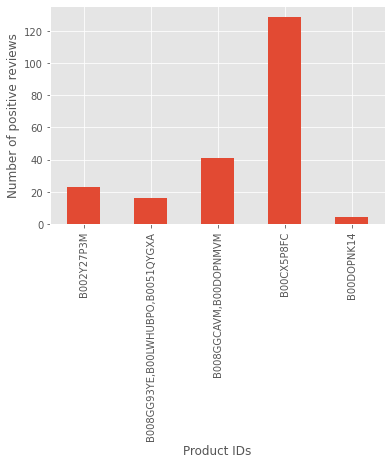

In [ ]:

products_df['sentiment'] = pd.to_numeric(products_df['sentiment'],errors = 'coerce')
products_df2 = products_df.groupby('asins')['sentiment'].sum().head(5).plot(kind='bar',xlabel="Product IDs",ylabel="Number of positive reviews")
print(products_df2)

**Overall Reviews Analysis**

according to our Distribution of sentiment analysis, we found that around 78% of the overall reviews are positive and around 21% are negative.

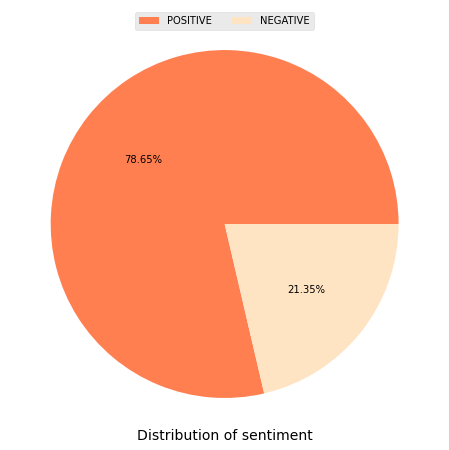

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['coral', 'bisque']
plt.pie(df['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
df[df['sentiment']=='1'].count()

reviews.text         1256
tokenized            1256
No_stopwords         1256
stemmed_porter       1256
stemmed_snowball     1256
lemmatized           1256
neg                  1256
neu                  1256
pos                  1256
compound             1256
sentiment            1256
sentiment_meaning       0
dtype: int64

In [ ]:
# Function to get the commented words from the lemmatized data to build a word cloud
def comment_words(senti):
  comment_words=''
  for val in df[df['sentiment']==senti]['lemmatized']:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

      return(comment_words)

In [ ]:
# Function to build a word cloud
def word_clou(comment_words):
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  return(plt.show())

**Positive Word Cloud**

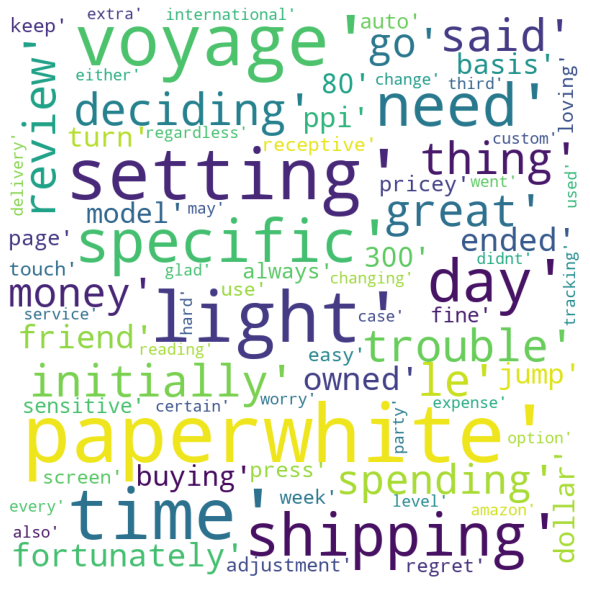

In [ ]:
word_clou(comment_words('1')) # positive word cloud



**Negative Word Cloud**

```

```



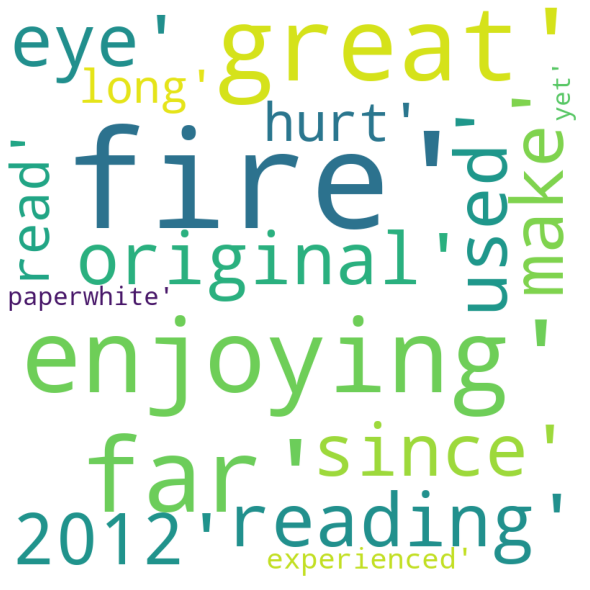

In [ ]:
word_clou(comment_words('0')) # negative word cloud

In [ ]:
all_words=pd.Series(''.join(df['reviews.text']).split())
all_words

0                 I
1         initially
2               had
3           trouble
4          deciding
            ...    
264101      months.
264102          Not
264103        worth
264104          the
264105       money.
Length: 264106, dtype: object

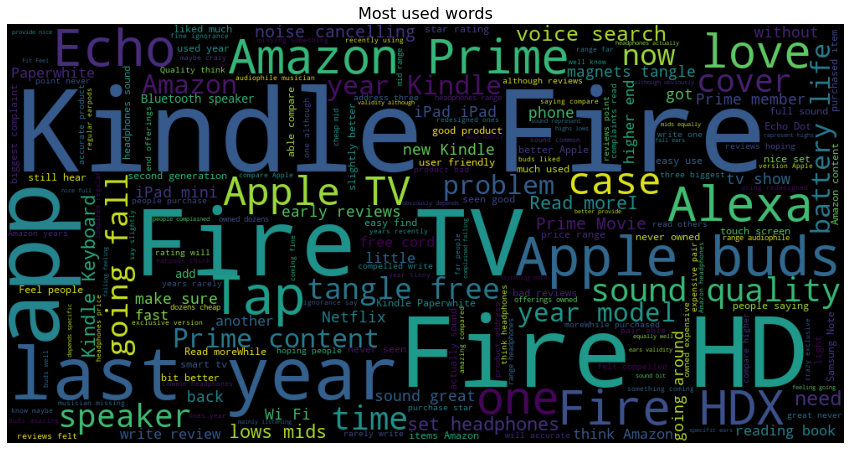

In [ ]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
wordcloud=WordCloud(width=1000,height=500).generate(' '.join(all_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Most used words',size =16)
plt.axis('off')
plt.show()

In [ ]:
#Function to return the text
def tokenize(text):
    return text

In [ ]:

# Creating an instance of CountVectorizer with min_df 3,
# created n grams 1 & 2, removed any extra stop words
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer(tokenizer = tokenize, min_df = 3, ngram_range = (1,2),lowercase=False, stop_words='english')

# Fitting and transforming the above Vectorizer on the Cleaned Comments data
Term_Document_Matrix = Vectorizer.fit_transform(df['lemmatized']).toarray()


In [ ]:
# checking if the Vectorizer worked properly
print("Term Document Matrix shape, max and sum are")
print(Term_Document_Matrix.shape)
print(np.amax(Term_Document_Matrix))
print(np.sum(Term_Document_Matrix))

Term Document Matrix shape, max and sum are
(1597, 9346)
58
198232


In [ ]:
# Creating an instance of LDA Decomposer with 5 topics and using
# a random state to replicate the results every time we run
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=0).fit(Term_Document_Matrix)


In [ ]:
# Transforming the Term Document to Probability densities of Topics

Topic_Matrix = list(lda.transform(Term_Document_Matrix))

In [ ]:
# Convert the Topic Matrix to DataFrame and pull out the topic with highest probability
# for each document and then find the topic wise distribution
Counts = pd.DataFrame(Topic_Matrix).idxmax(axis=1).value_counts()

In [ ]:

# Looping through the Counts to print the Topic Distribution
print("Topic Distribution is")
i = 0
while i < 5:
    print("Topic", i, ":", Counts[i])
    i = i + 1

# Getting the names of the features
terms = Vectorizer.get_feature_names()


Topic Distribution is
Topic 0 : 168
Topic 1 : 238
Topic 2 : 874
Topic 3 : 168
Topic 4 : 149


In [ ]:
print("Top 5 Words in the 5 topics are: ")
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([terms[i] for i in topic.argsort()[:-5 - 1:-1]]))

Top 5 Words in the 5 topics are: 
Topic 0:
prime like headphone want tablet
Topic 1:
kindle tablet device amazon hdx
Topic 2:
 amazon kindle great echo
Topic 3:
tv roku headphone box content
Topic 4:
sound review read like apple


**PREDICTION MODELS**

We need to build a strong prediction model to predict and classify the reviews into positive and negative sentiment.

In [ ]:
#Impoting packages that are required for prediction analysis
import tensorflow_datasets as tfds
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Splitting the data into train and test with 80:20.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiment,test_size=0.20, random_state = 0,stratify=sentiment)


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
#Vectorizing the training and testing data
Vectorizer.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(Vectorizer.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  8141


In [ ]:
X_train = Vectorizer.transform(X_train)
X_test  = Vectorizer.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
# Function to evaluate the model and generate confusion matrix
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        68
           1       0.93      0.92      0.93       252

    accuracy                           0.88       320
   macro avg       0.83      0.84      0.83       320
weighted avg       0.89      0.88      0.89       320



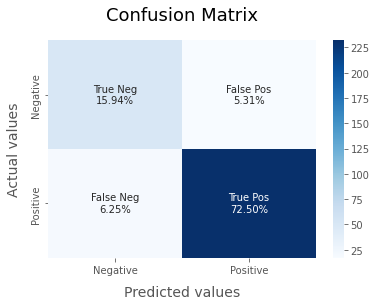

In [ ]:
# Logit Model
Logitmodel = LogisticRegression(C = 100000)

# Logit Model training
Logitmodel.fit(X_train, y_train)
y_pred_logit = Logitmodel.predict(X_test)

model_Evaluate(Logitmodel)


In [ ]:

# Logit Model evaluation
roc_auc_score_logit = roc_auc_score(y_test, y_pred_logit)
print("Logit model test roc_auc_score:: {:.2f}%".format(roc_auc_score_logit*100))

Logit model test roc_auc_score:: 83.53%


In [ ]:
import sklearn.metrics as metrics

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        68
           1       0.94      0.92      0.93       252

    accuracy                           0.89       320
   macro avg       0.83      0.84      0.84       320
weighted avg       0.89      0.89      0.89       320



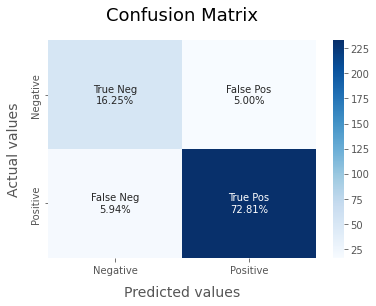

In [ ]:
# SVM Model
SVMmodel = LinearSVC(C = 100000)

# SVM Model training
SVMmodel.fit(X_train, y_train)

y_pred_SVM = SVMmodel.predict(X_test)



model_Evaluate(SVMmodel)

In [ ]:
# SVM Model evaluation
roc_auc_score_svm = roc_auc_score(y_test, y_pred_SVM)
print("SVM model roc_auc_score:: {:.2f}%".format(roc_auc_score_svm*100))

SVM model roc_auc_score:: 84.47%


              precision    recall  f1-score   support

           0       0.32      0.97      0.48        68
           1       0.98      0.44      0.61       252

    accuracy                           0.55       320
   macro avg       0.65      0.71      0.54       320
weighted avg       0.84      0.55      0.58       320



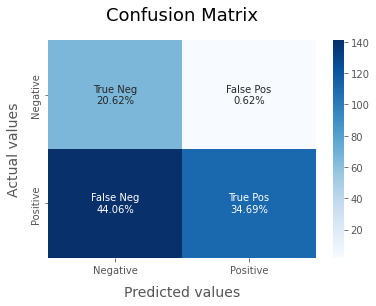

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
#print(y_pred1)

In [ ]:
roc_auc_score_svm = roc_auc_score(y_test, y_pred1)
print("Bernoulli model roc_auc_score:: {:.2f}%".format(roc_auc_score_svm*100))

Bernoulli model roc_auc_score:: 70.55%


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



              precision    recall  f1-score   support

           0       0.70      0.71      0.70        68
           1       0.92      0.92      0.92       252

    accuracy                           0.87       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.87      0.87      0.87       320



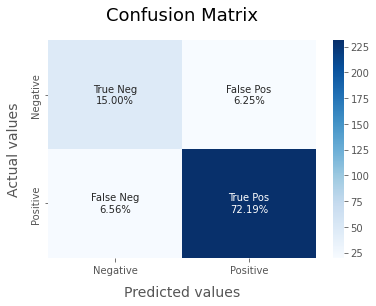

In [ ]:
model_Evaluate(clf)

In [ ]:
roc_auc_score_svm = roc_auc_score(y_test, y_pred)
print("Decision tree roc_auc_score:: {:.2f}%".format(roc_auc_score_svm*100))

Decision tree roc_auc_score:: 81.13%


**Conclusion:**

From the all the above modeks we found out that SVM is giving the highest accuracy.
